1. The data Prof. Reyes already prepared it during the tutorial.

In [12]:
# link to GitHub
# No need to download this dat YET
link="https://github.com/DACSS-CSSmeths/Spatial-Exploring/raw/refs/heads/main/maps/countriesCIA.gpkg"

# we use geopandas
# geopandas is in Colab, you need to install it in Anaconda.
import geopandas as gpd

# just the list of maps in that file
gpd.list_layers(link)

,name,geometry_type
0,cia,MultiPolygon
1,border,MultiPolygon


In [13]:
# read the data
countriesCIA=gpd.read_file(link, layer='cia')
worldBorders=gpd.read_file(link, layer='border')

Take a look at it:

In [14]:
# see some rows
countriesCIA.head()

,COUNTRY,name,region,obesityAdults_rate,TobaccoUse_perc,Alcohol_LitersPerCap,tobacco_code,tobacco_levels,tobacco_custom,alcohol_code,alcohol_levels,geometry
0,Afghanistan,Afghanistan,South Asia,5.5,23.3,0.01,2,3.average,3.(15-30],0,1.very low,"MULTIPOLYGON (((61.27656 35.60725, 61.29638 35..."
1,Algeria,Algeria,Africa,27.4,21.0,0.59,2,3.average,3.(15-30],0,1.very low,"MULTIPOLYGON (((-5.15213 30.18047, -5.13917 30..."
2,Azerbaijan,Azerbaijan,Middle East,19.9,24.0,1.38,2,3.average,3.(15-30],0,1.very low,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."
3,Albania,Albania,Europe,21.7,22.4,4.40,2,3.average,3.(15-30],2,3.average,"MULTIPOLYGON (((20.79192 40.43154, 20.78722 40..."
4,Armenia,Armenia,Middle East,20.2,25.5,3.77,2,3.average,3.(15-30],1,2.low,"MULTIPOLYGON (((46.54037 38.87559, 46.51639 38..."


In [15]:
# the data types
countriesCIA.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   COUNTRY               147 non-null    object  
 1   name                  147 non-null    object  
 2   region                147 non-null    object  
 3   obesityAdults_rate    147 non-null    float64 
 4   TobaccoUse_perc       147 non-null    float64 
 5   Alcohol_LitersPerCap  147 non-null    float64 
 6   tobacco_code          147 non-null    int64   
 7   tobacco_levels        147 non-null    object  
 8   tobacco_custom        147 non-null    object  
 9   alcohol_code          147 non-null    int64   
 10  alcohol_levels        147 non-null    object  
 11  geometry              147 non-null    geometry
dtypes: float64(3), geometry(1), int64(2), object(6)
memory usage: 13.9+ KB


2. The variable for the homework as we are trying to find obesity.

In [4]:
# we want to CUT this variable into bins
countriesCIA.obesityAdults_rate.describe()

,obesityAdults_rate
count,147.000000
mean,19.506122
std,10.253340
min,2.100000
25%,9.750000
50%,20.800000
75%,25.100000
max,61.000000


For the homework I needed to install pysal in Colab and in Anaconda.

In [5]:
!pip install pysal # write a "#" (no quotations) after the installation

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 748.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.8/142.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 64.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.6/141.6 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.1/243.1 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━

I requested to decide what is the best scheme if I wanted to split the data into 5 intervals.

Below you see



```
theVar=countriesCIA.TobaccoUse_perc
```

We must change the variable in order to compute for Obesity!



In [6]:

import mapclassify
import numpy as np

np.random.seed(12345) # so we all get the same results!

# let's try 5 bins
K=5

theVar=countriesCIA.obesityAdults_rate


# same interval width, easy interpretation
ei5 = mapclassify.EqualInterval(theVar, k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd = mapclassify.StdMean(theVar)
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts
q5=mapclassify.Quantiles(theVar,k=K)
# based on similarity, good for multimodal data
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
# based on similarity, optimizer
fj5 = mapclassify.FisherJenks(theVar, k=K)
# based on similarity, optimizer
jc5 = mapclassify.JenksCaspall(theVar, k=K)
# based on similarity, optimizer
mp5 = mapclassify.MaxP(theVar, k=K)

###### based on similarity, good for skewed data
ht = mapclassify.HeadTailBreaks(theVar) # no K needed

With these results, I chose the best aka the shortest bar (select the shortest bar).

**WHICH ONE IS THE BEST?**

<Axes: ylabel='Classifier'>

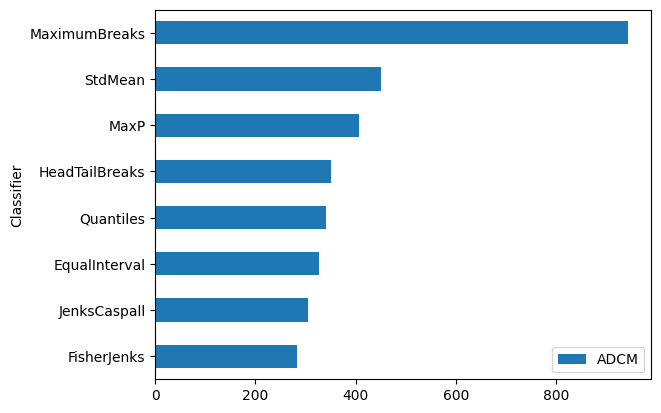

In [7]:
import pandas as pd

# Create a list of classifiers
class5 = ei5,msd, q5,mb5,  ht, fj5, jc5, mp5

# Collect ADCM for each classifier
fits = np.array([ c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['classifier'] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ['ADCM', 'Classifier']

# see the results
adcms.sort_values('ADCM').plot.barh(x='Classifier')

The winner is one of these, which is FisherJenks5.



```
ei5,msd, q5,mb5,  ht, fj5, jc5, mp5
```



I wrote:

```
countriesCIA['obesity_code']=fj5.yb
```
When FisherJenks was the best....what would you change below if we are using 'countriesCIA.TobaccoUse_perc'? Easy, we'd simply switch out tobacco for obesity!


In [16]:
# map of labels for the levels
newLevels={0:'1.very low',1:'2.low', 2:'3.average',3:'4.high', 4:'5.very high'}

# get the values
countriesCIA['obesity_code']=fj5.yb

# a copy in another column
countriesCIA=countriesCIA.assign(obesity_levels=countriesCIA.obesity_code)

# recoding
countriesCIA.replace({'obesity_levels':newLevels}, inplace=True)


If the winner was FisherJenks you go ahead and answer the question:
**Find the countries that are doing the best in all three variables?** (use the columns ending in _code_ for simplicity)

The countries that are doing the best are Benin, Chad, Eritrea, Ethiopia, Ghana, Mali, Mauritania, Niger, Senegal, and Togo!

In [17]:
countriesCIA[countriesCIA.obesity_code + countriesCIA.tobacco_code + countriesCIA.alcohol_code == 0]

,COUNTRY,name,region,obesityAdults_rate,TobaccoUse_perc,Alcohol_LitersPerCap,tobacco_code,tobacco_levels,tobacco_custom,alcohol_code,alcohol_levels,geometry,obesity_code,obesity_levels
17,Benin,Benin,Africa,9.6,6.9,1.25,0,1.very low,2.(5-15],0,1.very low,"MULTIPOLYGON (((2.73295 7.65821, 2.73222 7.651...",0,1.very low
26,Chad,Chad,Africa,6.1,8.3,0.55,0,1.very low,2.(5-15],0,1.very low,"MULTIPOLYGON (((14.19477 9.98175, 14.45055 9.9...",0,1.very low
42,Eritrea,Eritrea,Africa,5.0,7.5,0.93,0,1.very low,2.(5-15],0,1.very low,"MULTIPOLYGON (((42.06777 13.69778, 42.09027 13...",0,1.very low
44,Ethiopia,Ethiopia,Africa,4.5,5.1,1.16,0,1.very low,2.(5-15],0,1.very low,"MULTIPOLYGON (((45.4894 5.48976, 45.37447 5.36...",0,1.very low
49,Ghana,Ghana,Africa,10.9,3.5,1.59,0,1.very low,1. below5,0,1.very low,"MULTIPOLYGON (((0.32238 6.03584, 0.35375 6.023...",0,1.very low
83,Mali,Mali,Africa,8.6,8.3,0.60,0,1.very low,2.(5-15],0,1.very low,"MULTIPOLYGON (((-9.86522 12.05481, -9.91195 12...",0,1.very low
86,Mauritania,Mauritania,Africa,12.7,10.7,0.00,0,1.very low,2.(5-15],0,1.very low,"MULTIPOLYGON (((-6.33596 22.99026, -6.32583 22...",0,1.very low
94,Niger,Niger,Africa,5.5,7.4,0.11,0,1.very low,2.(5-15],0,1.very low,"MULTIPOLYGON (((7.02806 12.99577, 6.94222 12.9...",0,1.very low
118,Senegal,Senegal,Africa,8.8,6.9,0.25,0,1.very low,2.(5-15],0,1.very low,"MULTIPOLYGON (((-14.34175 12.67889, -14.39306 ...",0,1.very low
128,Togo,Togo,Africa,8.4,6.8,1.40,0,1.very low,2.(5-15],0,1.very low,"MULTIPOLYGON (((1.65542 7.52977, 1.65014 7.513...",0,1.very low


In [19]:
countriesCIA.to_file('countriesCIA.gpkg', driver='GPKG', layer='cia')
worldBorders.to_file('countriesCIA.gpkg', driver='GPKG', layer='border')